In [2]:
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import lightkurve

### explores TESS targeted pixel files w/o lightkurve package

In [4]:
fits_file = "https://archive.stsci.edu/missions/tess/tid/s0001/0000/0000/2515/5310/tess2018206045859-s0001-0000000025155310-0120-s_tp.fits"

In [5]:
fits.info(fits_file)

Filename: /Users/dee/.astropy/cache/download/py3/4df55a6fa65cd78c7ed1b355b055be9b
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  PIXELS        1 BinTableHDU    248   20076R x 11C   [D, E, J, 121J, 121E, 121E, 121E, 121E, J, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
  3  TARGET COSMIC RAY    1 BinTableHDU     27   0R x 4C   [J, I, I, E]   


In [6]:
fits.getdata(fits_file, ext=1).columns


ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '121J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11,11)'
    name = 'FLUX'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
)

In [7]:
with fits.open(fits_file, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    raw_counts = hdulist[1].data['RAW_CNTS']
    calibrated_fluxes = hdulist[1].data['FLUX']

In [8]:
print(type(calibrated_fluxes))
print(calibrated_fluxes.shape) #(number of cadences, xdimension of pixel cutout, ydimension of pixel cutout)

<class 'numpy.ndarray'>
(20076, 11, 11)


In [9]:
calibrated_fluxes[4,:,:].shape #data from 5th cadence only!!! (B/C of 4 cut)


(11, 11)

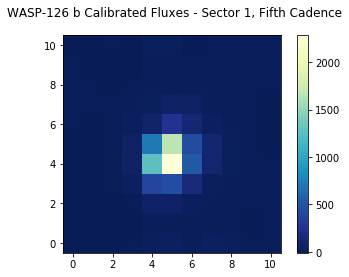

In [10]:
# Start figure and axis.
fig, ax = plt.subplots()

# Display the calibrated fluxes as an image for the fifth cadence.
cax = ax.imshow(calibrated_fluxes[4,:,:], cmap=plt.cm.YlGnBu_r, origin="lower")

# Let's define a title for the figure.
fig.suptitle("WASP-126 b Calibrated Fluxes - Sector 1, Fifth Cadence")

# Add a color bar.
cbar = fig.colorbar(cax)
plt.show()

In [11]:
with fits.open(fits_file, mode="readonly") as hdulist:
    aperture = hdulist[2].data

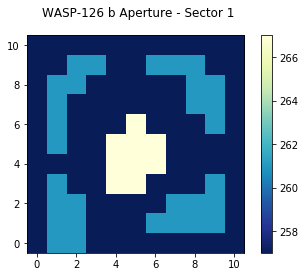

In [12]:
# Start figure and axis.
fig, ax = plt.subplots()

# Display the pixels as an image.
cax = ax.imshow(aperture, cmap=plt.cm.YlGnBu_r, origin="lower")

# Add a color bar.
cbar = fig.colorbar(cax)

# Add a title to the plot.
fig.suptitle("WASP-126 b Aperture - Sector 1")
plt.show()

In [18]:
# Break down a pixel value of 267 (yellow pixels displayed above) into its constituent bits.
bits = np.binary_repr(267) #261) #100000101
print(bits)

100001011


In [19]:
# Create an array that will keep track of which pixels have a bitmask
# value of 2 set. To start, everything is set to 0 = not set.  We make it
# the same dimension as the aperture pixel table, for clarity.
bitmask2_set = np.zeros(aperture.shape)

# Identify which pixels have the bit mask value of 2 set.  We'll first
# loop over each row (i) in the 11x11 table, and then each column (j).
for i,row in enumerate(aperture):
    for j, pix in enumerate(row):

        # Get the bitmask as a string of zeros and ones.
        this_bitmask = np.binary_repr(pix)

        # Is the bitmask value of 2 set?  If so, the 2nd integer from the
        # right should be set to 1.  We'll use Python negative indexes to
        # access the second integer from the right.
        if this_bitmask[-2] == '1':
            
            # Then record this pixel as having a bitmask value of 2 set.
            bitmask2_set[i,j] = 1

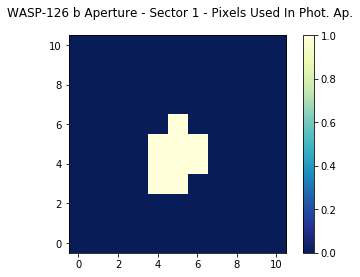

In [20]:
# Start figure and axis.
fig, ax = plt.subplots()

# Display, as an image, the 11x11 table that records the bitmask value of 2 being set.
cax = ax.imshow(bitmask2_set, cmap=plt.cm.YlGnBu_r, origin="lower")

# Add a color bar.
cbar = fig.colorbar(cax)

# Add a title to the plot.
fig.suptitle("WASP-126 b Aperture - Sector 1 - Pixels Used In Phot. Ap.")
plt.show()

## Tess targeted pixel files - with lightkurve package

In [21]:
from lightkurve import TessTargetPixelFile
tpf = TessTargetPixelFile('https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00261136679-s01_tess_v1_tp.fits')

In [26]:
tpf??

In [30]:
tpf.header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    3 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2018-08-27'         / file creation date.                            
TSTART  =    1325.293656167129 / observation start time in TJD                  
TSTOP   =    1353.176978345185 / observation stop time in TJD                   
DATE-OBS= '2018-07-25T19:01:

In [32]:
tpf[2]

TessTargetPixelFile(TICID: 261136679)

In [36]:
tpf.shape

(18104, 21, 11)

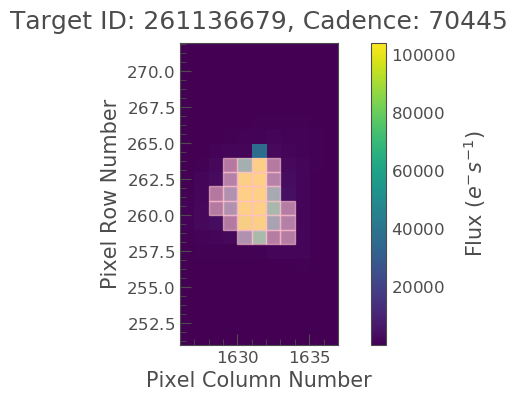

In [45]:
#with aperature overlay

#tpf[4,:,:]
#tpf[1].data #doesnt work
tpf.plot(aperture_mask=tpf.pipeline_mask);

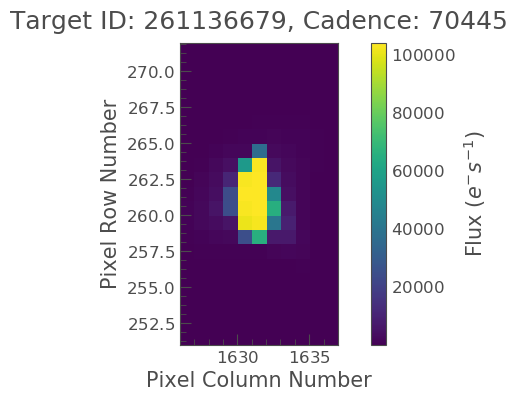

In [44]:
#star w/o aperature overlay

tpf.plot();

# getting a light curve

In [46]:
original_file = tpf.hdu
original_file.info

<bound method HDUList.info of [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x11d8426d8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11d97e630>, <astropy.io.fits.hdu.image.ImageHDU object at 0x11da6ac18>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11da96320>]>

In [52]:
original_file[2].header #[0]=data;[1]=bintable;[2]=aperature;[3]=bintable

XTENSION= 'IMAGE   '           / marks the beginning of a new HDU               
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   11 / length of first array dimension                
NAXIS2  =                   21 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'APERTURE'           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
TELESCOP= 'TESS    '           / telescope                                      
INSTRUME= 'TESS Photometer' 

In [54]:
original_file[0].data

In [57]:
print(tpf.flux.shape,tpf.flux)

(18104, 21, 11) [[[  -1.3825388  -37.66533    -91.830536  ... -108.04645   -103.54175
   -134.1816   ]
  [-135.68407   -125.30367   -112.52773   ... -113.03839   -122.92997
   -131.28302  ]
  [-147.63722   -142.73625   -134.99854   ... -101.330734  -114.31767
   -121.03055  ]
  ...
  [-138.13503   -137.8448    -146.29425   ...  -77.273094  -105.22347
   -135.82652  ]
  [-142.20255   -139.6766    -147.65201   ... -118.81814   -129.52805
   -130.46175  ]
  [-133.71326   -134.32669   -148.82013   ... -127.16725    -90.90953
   -112.974434 ]]

 [[  -3.390986   -47.140965   -90.53796   ... -106.87563   -108.55464
   -136.6413   ]
  [-133.7175    -125.38933   -114.30842   ... -115.82087   -125.8608
   -132.87209  ]
  [-147.48918   -142.87836   -138.43767   ... -103.16773   -116.372955
   -119.86726  ]
  ...
  [-138.81976   -138.86803   -146.27737   ...  -78.0859    -107.27506
   -136.54706  ]
  [-139.40416   -141.568     -148.46045   ... -122.45605   -127.82529
   -132.05716  ]
  [-131.66135

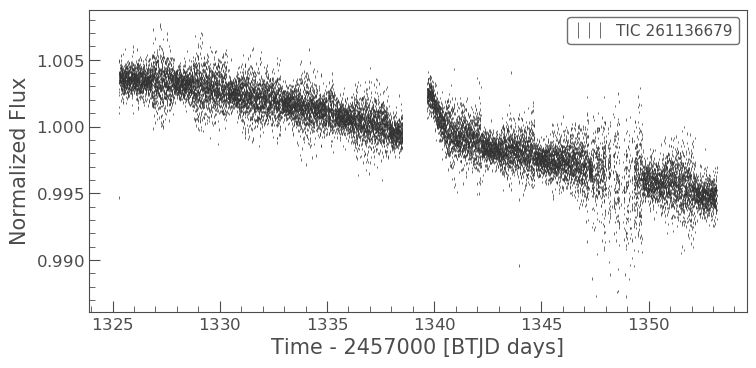

In [58]:
lc = tpf.to_lightcurve()
lc.errorbar();


In [59]:
lc??

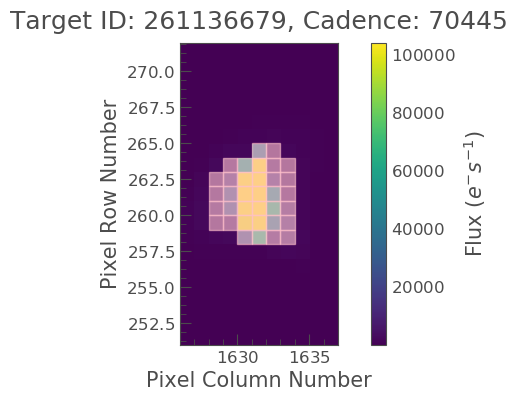

In [60]:
import numpy as np

# Create a median image of the source over time
median_image = np.nanmedian(tpf.flux, axis=0)

# Select pixels which are brighter than the 85th percentile of the median image
aperture_mask = median_image > np.nanpercentile(median_image, 85)

# Plot that aperture
tpf.plot(aperture_mask=aperture_mask);

In [61]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)


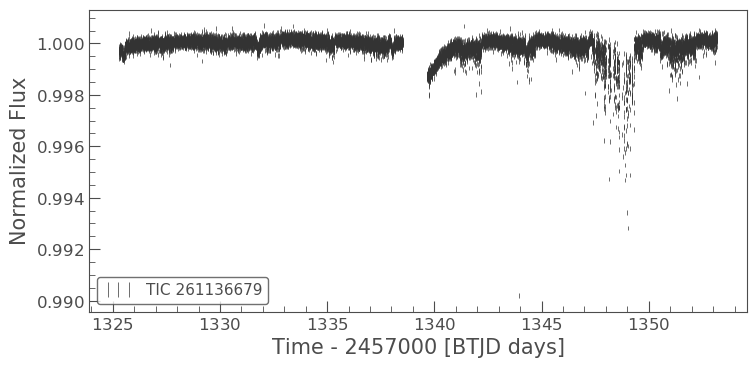

In [62]:
lc.errorbar();


# Data Cleaning

In [63]:
# removing long term trend


# total Number of cadences in the full light curve
print(lc.time.shape)

(18104,)


noisy section due to TESS jitter, ie bad data, want to mask in next cell


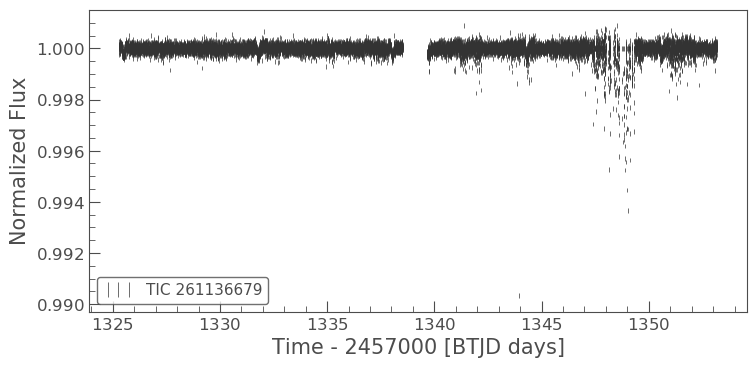

In [70]:
flat_lc = lc.flatten(window_length=1001) #applys a smoothing filter, 1001 is # of cadences
flat_lc.errorbar();

print('noisy section due to TESS jitter, ie bad data, want to mask in next cell')

In [66]:
# Flag the times that are good quality
mask = (flat_lc.time < 1346) | (flat_lc.time > 1350)

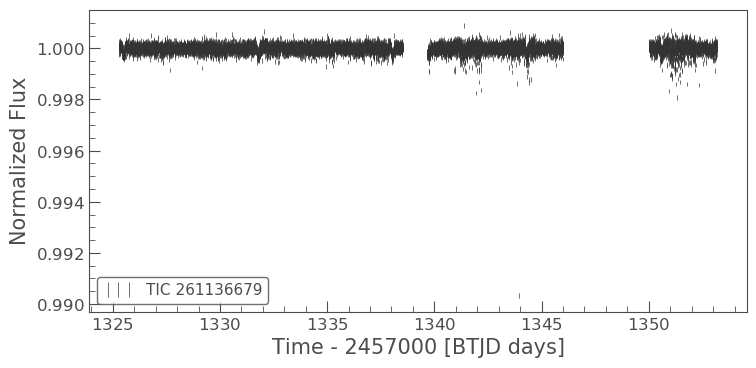

In [67]:
masked_lc = flat_lc[mask]
masked_lc.errorbar();

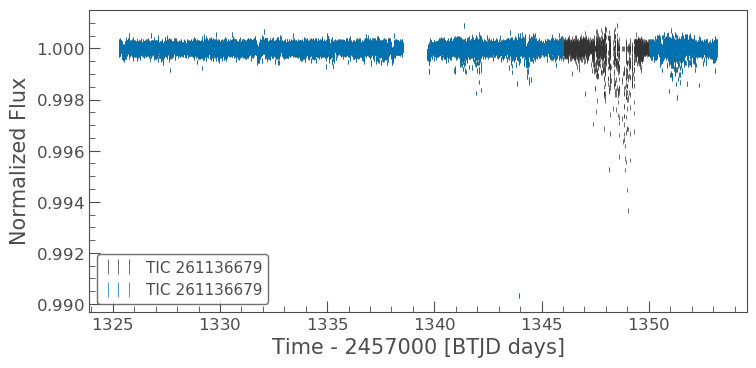

In [68]:
# First define the `matplotlib.pyplot.axes`
ax = flat_lc.errorbar()

# Pass that axis to the next plot
masked_lc.errorbar(ax=ax);

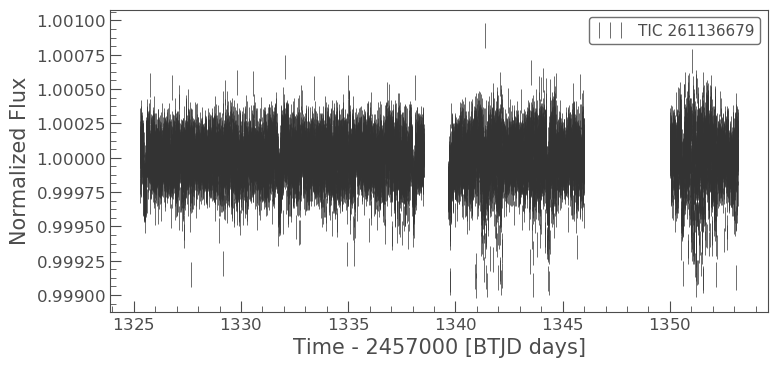

In [69]:
#removes outliers


clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.errorbar();

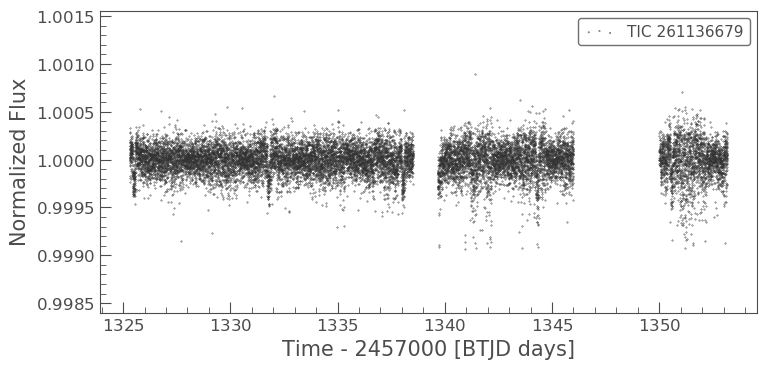

In [71]:
clipped_lc.scatter(s=0.1);

In [74]:
#testing diff ways to write/use methods


tpf.to_lightcurve().scatter

<bound method LightCurve.scatter of TessLightCurve(TICID: 261136679)>

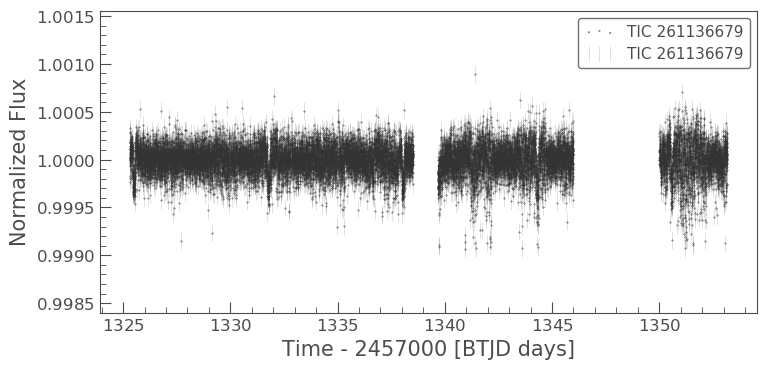

In [77]:
ax = clipped_lc.scatter(s=0.1)
clipped_lc.errorbar(ax=ax, alpha=0.2);  # alpha determines the transparency

# ready to find the transit

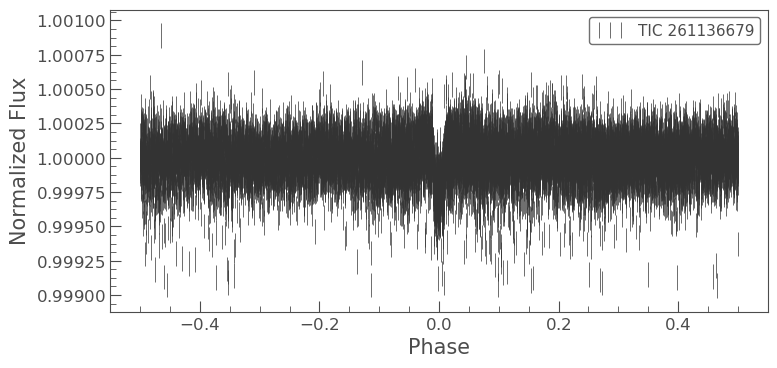

In [78]:
#folds data at exoplanets period to see transit


folded_lc = clipped_lc.fold(period=6.27, t0=1325.504)
folded_lc.errorbar();

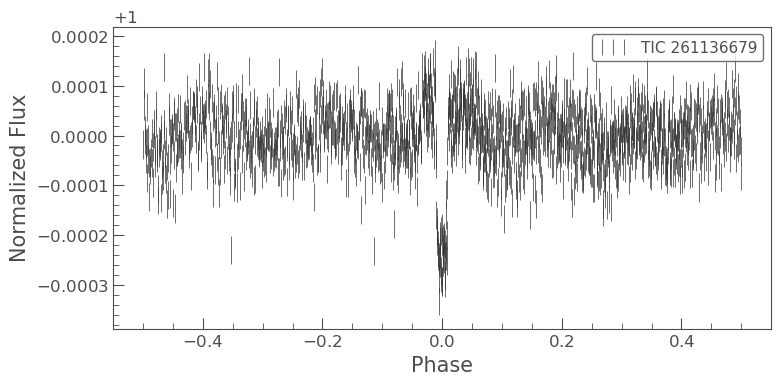

In [79]:
#bin to reduce uncertainity & visualize with less data points to make transit pop out


binned_lc = folded_lc.bin(binsize=10)  # Average 10 points per bin
binned_lc.errorbar();

# condenses all above steps

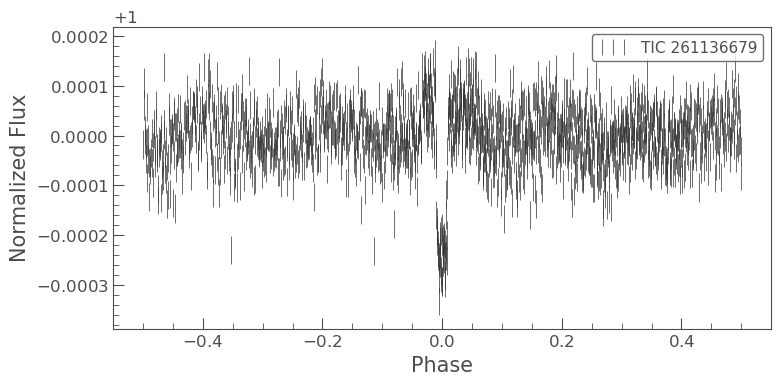

In [80]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask).flatten(window_length=1001)
lc = lc[(lc.time < 1346) | (lc.time > 1350)]
lc.remove_outliers(sigma=6).fold(period=6.27, t0=1325.504).bin(binsize=10).errorbar();

# Compares pipeline aperture to our custom aperture

In [81]:
# Use the default
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask).flatten(window_length=1001)
lc = lc[(lc.time < 1346) | (lc.time > 1350)].remove_outliers(6).fold(period=6.27, t0=1325.504).bin(10)

# Use a custom aperture
custom_lc = tpf.to_lightcurve(aperture_mask=aperture_mask).flatten(window_length=1001)
custom_lc = custom_lc[(custom_lc.time < 1346) | (custom_lc.time > 1350)].remove_outliers(6).fold(period=6.27, t0=1325.504).bin(10)

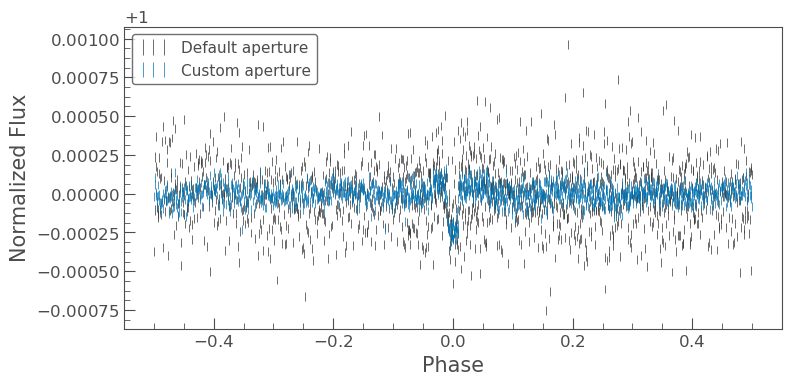

In [82]:
ax = lc.errorbar(label='Default aperture')
custom_lc.errorbar(ax=ax, label='Custom aperture');